In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def F(x):
    sum = x[0]

In [129]:
def plot(X,y,pred,xtest):
    plt.figure(figsize=(6,5))
    plt.scatter(X,y)
    plt.plot(xtest,pred,'*-',color='red')
    plt.grid(True)
    plt.ylabel('Valor Y(prever)')
    plt.xlabel('Caracteristica')
    plt.show()

In [130]:
class RegressaoLinear():
    def __init__(self,svd=False,pseudo=False):
        self.pseudo = pseudo
        self.svd    = svd
    def fit(self,X:np.array,y:np.array):
        X = np.c_[np.ones((np.size(X),1)),X]

        if   (self.svd):
            self.theta = np.linalg.pinv(X).dot(y)
        elif (self.pseudo):
            self.theta = np.linalg.pinv(X).dot(y)
        else:
            theta = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
            self.theta = theta

    def predict(self,X):
        X = np.c_[np.ones((np.size(X))),X]
        return X.dot(self.theta)

In [131]:
X = 2 * np.random.rand(100,1)
y = 4*X +np.random.randn(100,1)

In [132]:
xtest = np.array([[0],[2],[1]])
print(xtest)

[[0]
 [2]
 [1]]


In [133]:
reg  = RegressaoLinear(pseudo=True)
reg.fit(X,y)
pred = reg.predict(xtest)

In [134]:
pred,xtest

(array([[0.04911847],
        [8.09239405],
        [4.07075626]]),
 array([[0],
        [2],
        [1]]))

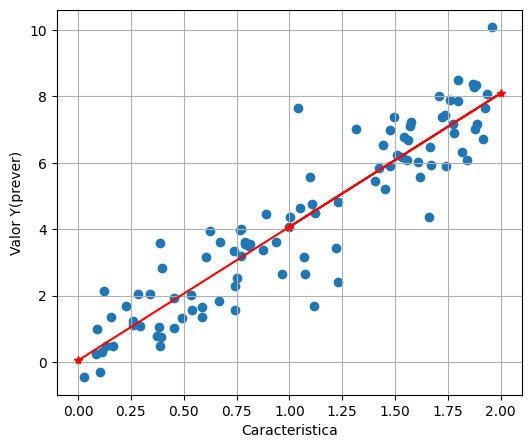

In [135]:
plot(X,y,pred,xtest)

In [136]:
from sklearn.linear_model import LinearRegression
regLi = LinearRegression()
regLi.fit(X,y)
print(regLi.coef_)
pred = regLi.predict(xtest)

[[4.02163779]]


In [137]:
pred

array([[0.04911847],
       [8.09239405],
       [4.07075626]])

In [138]:
print(regLi.coef_,regLi.intercept_)

[[4.02163779]] [0.04911847]


### Gradiente descendente em lote(batch)

$\nabla_{\theta} MSE(\theta) = \frac{2}{m} \cdot X^T (X\cdot\theta - y)$
> Vetor gradiente da função de custo

$\theta_{iter} = \theta - \eta \cdot \nabla MSE(\theta)$
> etapa do gradiente descendente

In [139]:
class GradientBatch:
    def __init__(self,theta = np.random.randn(2,1), eta = 0.1 , maxiter = 1_000):
        self.theta   = theta
        self.eta     = eta 
        self.maxiter = maxiter


    def condition(self,vetor):
        if ( np.any(np.isinf(vetor))   ):return True 
        if ( np.any(np.isnan(vetor))   ):return True
        if ( np.any(np.isneginf(vetor))):return True
        return False
    
    def fit(self,X:np.array,y=None):
        m =  np.size(X)
        X =  np.c_[np.ones((m,1)),X]

        for iter in range(self.maxiter):
            vetorGradiente = X.T.dot(X.dot(self.theta) - y)
            vetorGradiente = 1/m * vetorGradiente
            
            if self.condition(vetorGradiente):
                break
            
            self.theta = self.theta - self.eta * vetorGradiente

            if self.condition(self.theta):
                break
        return self.theta
    
    def predict(self,X):
        X = np.c_[np.ones(np.size(X)),X]
        return X.dot(self.theta)

In [140]:
X = 2 * np.random.rand(100,1)
y = 4*X +np.random.randn(100,1)

In [141]:
xtest = np.array([[0],[2]])

In [142]:
grad = GradientBatch(eta=0.020398367346938777,maxiter=1000)
grad.fit(X,y)
pred  = grad.predict(xtest)

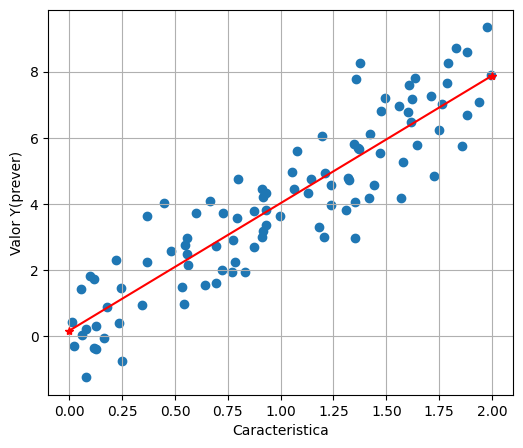

In [143]:
plot(X,y,pred,xtest)

#### Gradiente descendente Estocástico

In [145]:
class GradientStocastic:
    def __init__(self,t0 = 5, t1 = 50, n_epochs=50 ,theta = np.random.randn(2,1)):
        self.t0 = t0
        self.t1 = t1
        self.n_epochs = n_epochs
        self.theta    = theta

    def condition(self,vetor):
        if ( np.any(np.isinf(vetor))   ):return True 
        if ( np.any(np.isnan(vetor))   ):return True
        if ( np.any(np.isneginf(vetor))):return True
        return False
    
    def learning_rate(self,t):
        return self.t0 / (t+self.t1)
    
    def fit(self,X,y=None):
        m = np.size(X)
        X = np.c_[np.ones((m,1)),X]

        for epoch in range(self.n_epochs):
            for i in range(m):
                randomIndex = np.random.randint(m)
                xi = X[randomIndex:randomIndex+1]
                yi = y[randomIndex:randomIndex+1]

                gradient = 2 * xi.T.dot(xi.dot(self.theta)-yi)
                
                if (self.condition(gradient)):break

                eta        = self.learning_rate(epoch*m+i)
                self.theta = self.theta - eta * gradient

                if (self.condition(self.theta)):break
                
        return self.theta
    def predict(self,X):
        X = np.c_[np.ones(np.size(X)),X]
        return X.dot(self.theta)

In [146]:
gradStocastic = GradientStocastic()
gradStocastic.fit(X,y)

array([[0.09236656],
       [3.92082274]])

&nbsp;

In [148]:
from sklearn.linear_model import SGDRegressor
# Batch
batch = SGDRegressor(penalty=None,alpha=0.1,max_iter=1000,learning_rate='constant')

# Estocástico
stocastic = SGDRegressor(penalty=None,alpha=0.1,max_iter=1000,learning_rate='adaptive') 
